Further process RNA data.

In [124]:
import numpy as np
import copy
from datetime import datetime
import pickle
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [122]:
RNA_feature = pickle.load(open("RNAdata_API.pickle", "rb" ))

In [129]:
numsubjects = len(RNA_feature)
numRNAtimestamps = len(RNA_feature[0])

Do resampling.

In [127]:
num_need = 42

In [132]:
x = np.linspace(0, numRNAtimestamps-1, num=numRNAtimestamps, endpoint=True)
xnew = np.linspace(0, numRNAtimestamps-1, num=num_need, endpoint=True)

In [ ]:
RNA_feature_resampled = []
for i in range(numsubjects):
    y = copy.deepcopy(RNA_feature[i])
    f = interp1d(x, y, kind='cubic')
    RNA_feature_resampled.append(f(xnew))

Define the above as a function.

In [136]:
def RNAfeatureResample(RNA_feature,num_need):
    numsubjects = len(RNA_feature)
    numRNAtimestamps = len(RNA_feature[0])
    x = np.linspace(0, numRNAtimestamps-1, num=numRNAtimestamps, endpoint=True)
    xnew = np.linspace(0, numRNAtimestamps-1, num=num_need, endpoint=True)
    RNA_feature_resampled = []
    for i in range(numsubjects):
        y = copy.deepcopy(RNA_feature[i])
        f = interp1d(x, y, kind='cubic')
        RNA_feature_resampled.append(f(xnew))
    return RNA_feature_resampled

Make some plots of RNA data (after deletion of HRV15-014 and HRV15-015, and make all the subjects have 21 datapoints, by linear interplation).

In [62]:
RNAsummary = pickle.load(open("RNAcountdata.pickle", "rb" ))

In [63]:
# RNAsummary[1][0] # looks like the first data point for HRV15-002 has the wrong time

In [64]:
RNAcounts_by_subject = RNAsummary[0]

In [65]:
RNA_names = ['RSAD2','IFI44L','LAMP3','SERPING1','IFI44','IFIT1','ISG15','SIGLEC1','OAS3','HERC5',
            'IFIT3','IFI6','OASL','IFI27','ATF3','MX1','OAS1','XAF1','IFIT2','OAS2',
            'LY6E','DDX58','TNFAIP6','RTP4']

In [66]:
del RNAcounts_by_subject[11:13]

In [67]:
subject_ids_new = ['HRV15-002','HRV15-003','HRV15-004','HRV15-005','HRV15-006','HRV15-007','HRV15-008',
                   'HRV15-009','HRV15-011','HRV15-012','HRV15-013','HRV15-017','HRV15-018','HRV15-019',
                   'HRV15-020','HRV15-021','HRV15-022','HRV15-023','HRV15-024']
numSubject = len(subject_ids_new)

In [68]:
for i in range(len(subject_ids_new)):
    RNAcounts_by_subject[i] = np.delete(RNAcounts_by_subject[i],-2,1)

In [71]:
for i in range(-4,-1):
    temp = []
    for m in range(numRNAnames):
        temp.append(np.concatenate((RNAcounts_by_subject[i][m,:-2],
                        np.linspace(RNAcounts_by_subject[i][m,-2],RNAcounts_by_subject[i][m,-1],4)),axis=0))
        
    RNAcounts_by_subject[i] = np.array(copy.deepcopy(temp))
    

In [72]:
temp = []
for m in range(numRNAnames):
    temp.append(np.concatenate((np.array([RNAcounts_by_subject[-1][m,0]]),
                 np.linspace(RNAcounts_by_subject[-1][m,1],RNAcounts_by_subject[-1][m,2],3),
                 np.array([RNAcounts_by_subject[-1][m,3]]),
                 np.linspace(RNAcounts_by_subject[-1][m,3],RNAcounts_by_subject[-1][m,4],4)[1:],
                 np.linspace(RNAcounts_by_subject[-1][m,4],RNAcounts_by_subject[-1][m,5],4)[1:],
                 np.linspace(RNAcounts_by_subject[-1][m,5],RNAcounts_by_subject[-1][m,6],4)[1:],
                 np.linspace(RNAcounts_by_subject[-1][m,6],RNAcounts_by_subject[-1][m,7],4)[1:],
                 np.linspace(RNAcounts_by_subject[-1][m,7],RNAcounts_by_subject[-1][m,8],5)[1:])))

RNAcounts_by_subject[-1] = np.array(copy.deepcopy(temp))

In [73]:
numRNApoints = [len(RNAcounts_by_subject[x][1,]) for x in range(numSubject)]
numRNAnames = len(RNA_names)

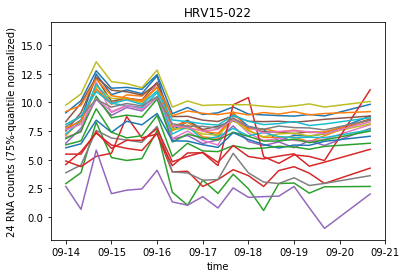

In [119]:
subject_id = 16
for i in range(numRNAnames):
    plt.plot(range(numRNApoints[subject_id]),RNAcounts_by_subject[subject_id][i,])
    plt.ylim(-2,17)

plt.xticks(range(0,22,3),['09-14','09-15','09-16','09-17','09-18','09-19','09-20','09-21'],color='black')
plt.xlabel('time')
plt.ylabel('24 RNA counts (75%-quantile normalized)')
plt.title('HRV15-022')         # the title should be changed according to "subject_id"
plt.show()
